In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("/content/PUB_PriceHOEPPredispOR_2024.csv", skiprows=3)
df.head()

,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
0,2024-01-01,1,46.42,34.68,33.80,27.83,1.26,0.17,0.17
1,2024-01-01,2,35.85,33.73,32.13,33.80,0.98,0.15,0.15
2,2024-01-01,3,27.73,33.73,27.22,29.86,0.98,0.15,0.15
3,2024-01-01,4,19.34,27.35,27.26,27.34,0.15,0.11,0.10
4,2024-01-01,5,20.23,27.20,27.26,27.27,0.10,0.10,0.10


In [ ]:
df.isna().sum()

,0
Date,0
Hour,0
HOEP,0
Hour 1 Predispatch,17
Hour 2 Predispatch,17
Hour 3 Predispatch,17
OR 10 Min Sync,0
OR 10 Min non-sync,0
OR 30 Min,0


In [ ]:
df.describe()

,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
count,8784.000000,8784.000000,8767.000000,8767.000000,8767.000000,8784.000000,8784.000000,8784.000000
mean,12.500000,32.186327,39.032400,38.581471,36.630476,4.568994,4.199612,2.070743
std,6.922581,27.048018,30.133082,27.471655,24.635936,19.124185,18.948557,13.839590
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.010000
25%,6.750000,22.960000,26.000000,25.970000,25.180000,0.200000,0.150000,0.150000
50%,12.500000,28.675000,32.130000,32.000000,31.050000,1.060000,0.350000,0.240000
75%,18.250000,35.810000,41.630000,41.385000,39.800000,2.545000,1.920000,1.000000
max,24.000000,1394.130000,1150.000000,500.000000,350.000000,1251.940000,1251.660000,1107.000000


In [ ]:
df["Hour"]=df["Hour"].apply(lambda x: "0"+str(x-1) if x<11 else str(x-1))
df["Time"]=df["Date"]+"-"+df["Hour"]
df["Time"]=df["Time"].apply(lambda x: x.strip())
df["Time"]=pd.to_datetime(df["Time"], format = "%Y-%m-%d-%H")
df=df.set_index("Time")
df=df.drop(["Date", "Hour"], axis=1)
df.head()

,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
Time,,,,,,,
2024-01-01 00:00:00,46.42,34.68,33.80,27.83,1.26,0.17,0.17
2024-01-01 01:00:00,35.85,33.73,32.13,33.80,0.98,0.15,0.15
2024-01-01 02:00:00,27.73,33.73,27.22,29.86,0.98,0.15,0.15
2024-01-01 03:00:00,19.34,27.35,27.26,27.34,0.15,0.11,0.10
2024-01-01 04:00:00,20.23,27.20,27.26,27.27,0.10,0.10,0.10


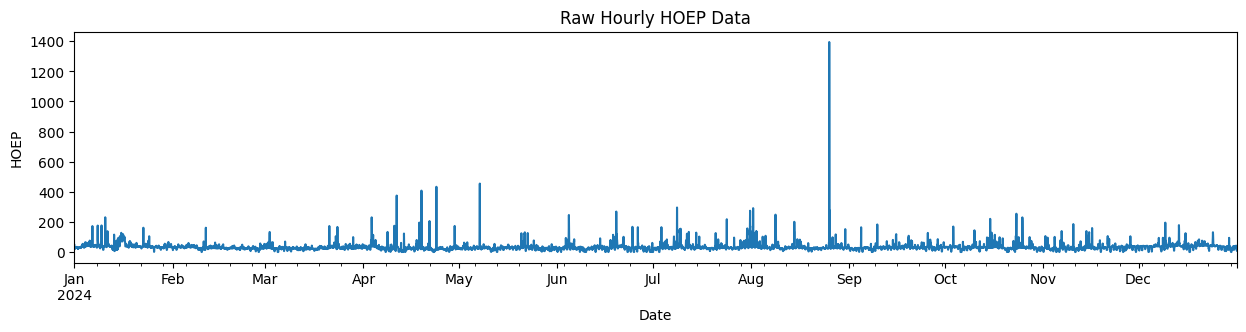

In [ ]:
#raw hourly data plot
fig=plt.figure(figsize=(15,3))
df["HOEP"].plot()
plt.xlabel("Date")
plt.ylabel("HOEP")
plt.title("Raw Hourly HOEP Data")
plt.show()

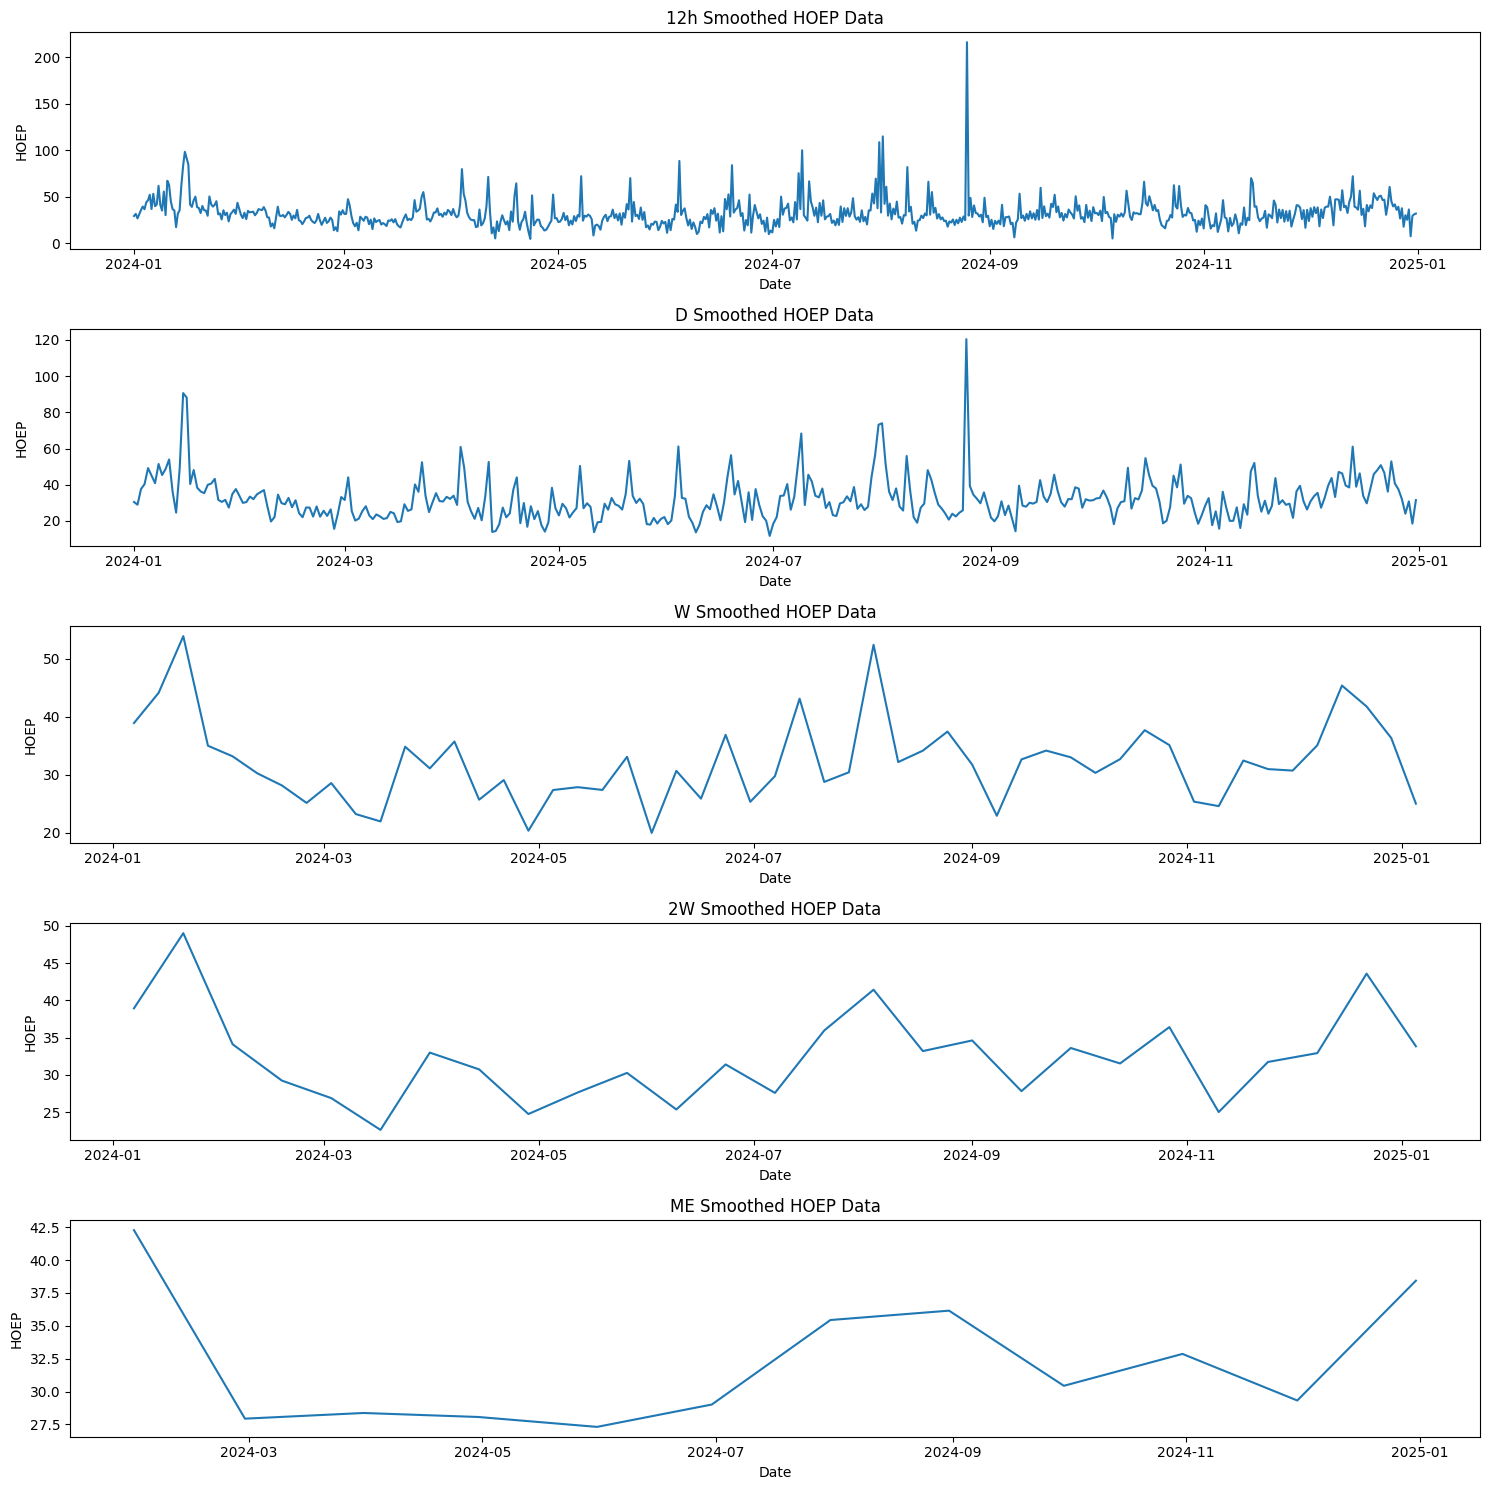

In [ ]:
smoothing_period = ["12h","D","W","2W","ME"]
fig,ax=plt.subplots(5,1,figsize=(15,15))
i=0
for period in smoothing_period:
  smooth_df=df.resample(period).mean()
  ax[i].plot(smooth_df.index,smooth_df["HOEP"])
  ax[i].set_title(period + " Smoothed HOEP Data")
  ax[i].set_xlabel("Date")
  ax[i].set_ylabel("HOEP")
  i+=1
plt.tight_layout()
plt.show()

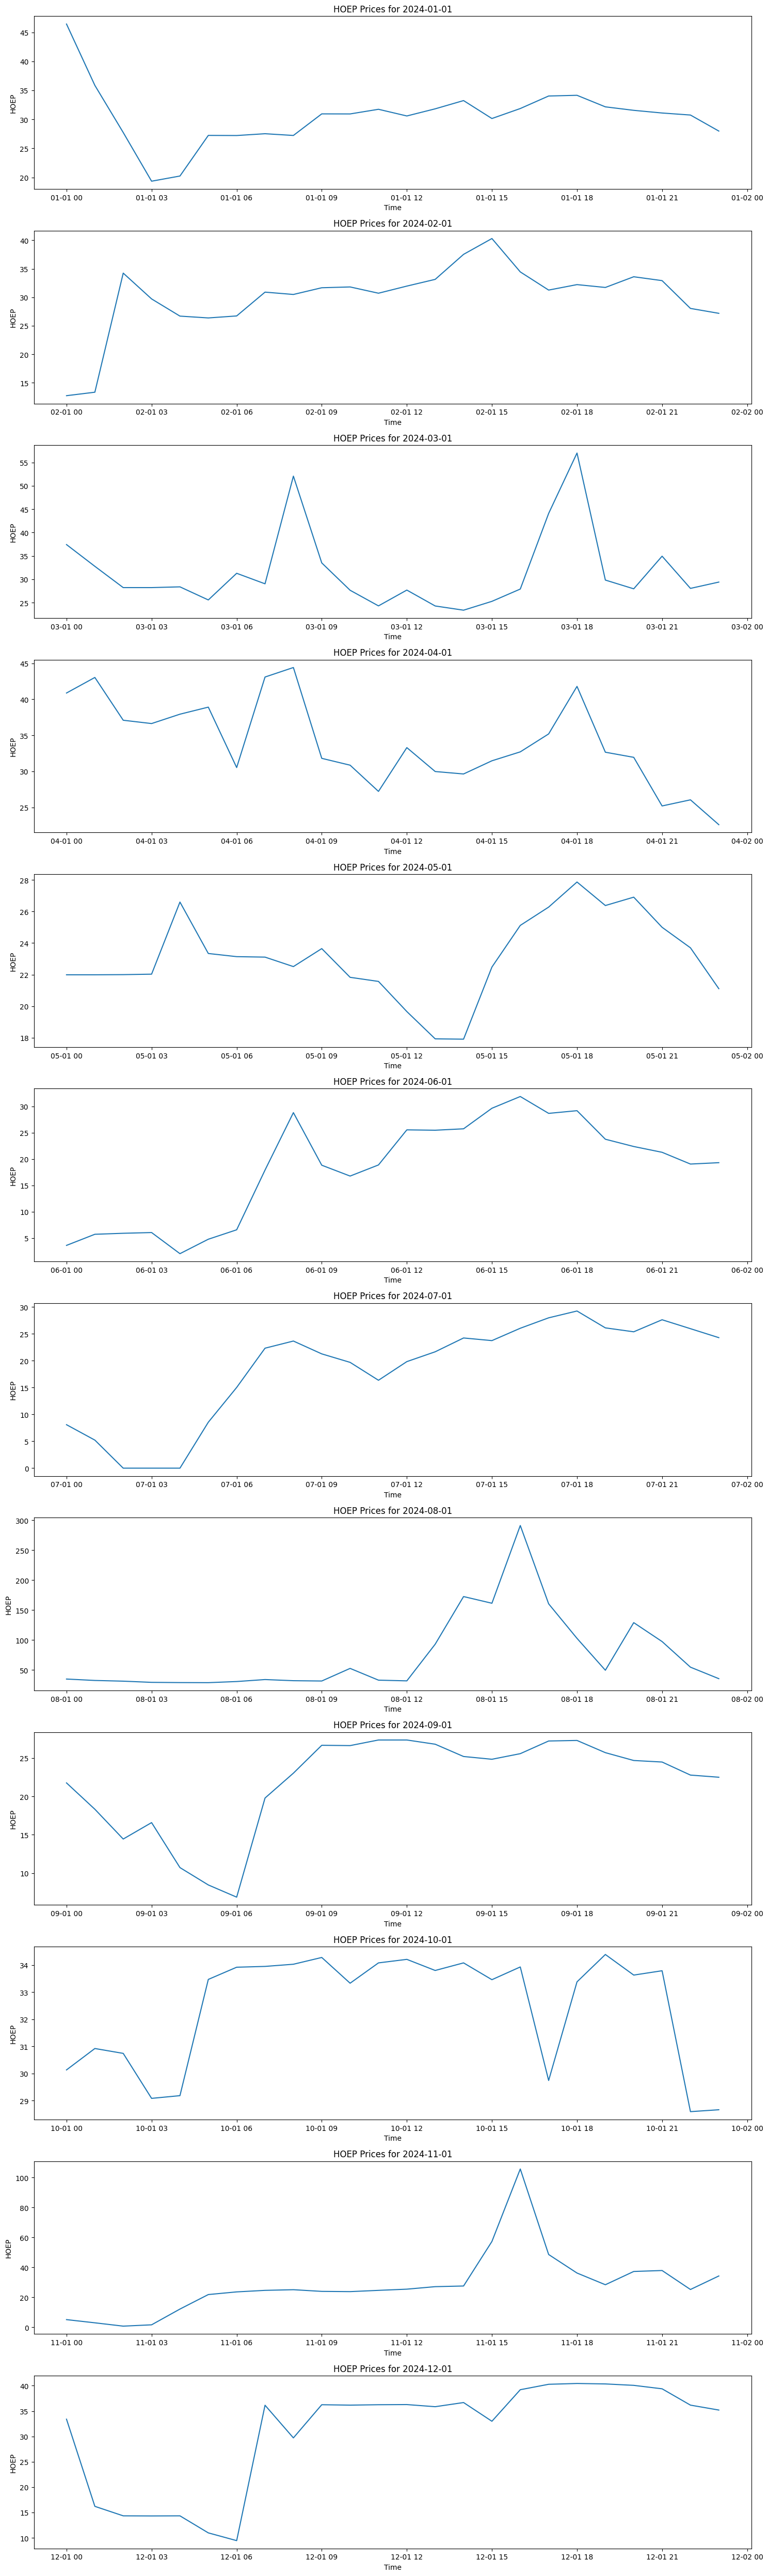

In [ ]:
days = ["2024-01-01", "2024-02-01", "2024-03-01", "2024-04-01", "2024-05-01",
        "2024-06-01","2024-07-01", "2024-08-01", "2024-09-01", "2024-10-01",
        "2024-11-01", "2024-12-01"]
fig,ax=plt.subplots(12,1, figsize=(15,50))
i=0
for day in days:
  day_ts=pd.to_datetime(day,format="%Y-%m-%d")
  day_df = df[df.index.date==day_ts.date()]
  ax[i].plot(day_df.index,day_df["HOEP"])
  ax[i].set_title("HOEP Prices for "+day)
  ax[i].set_xlabel("Time")
  ax[i].set_ylabel("HOEP")
  i+=1
plt.tight_layout()
plt.show()

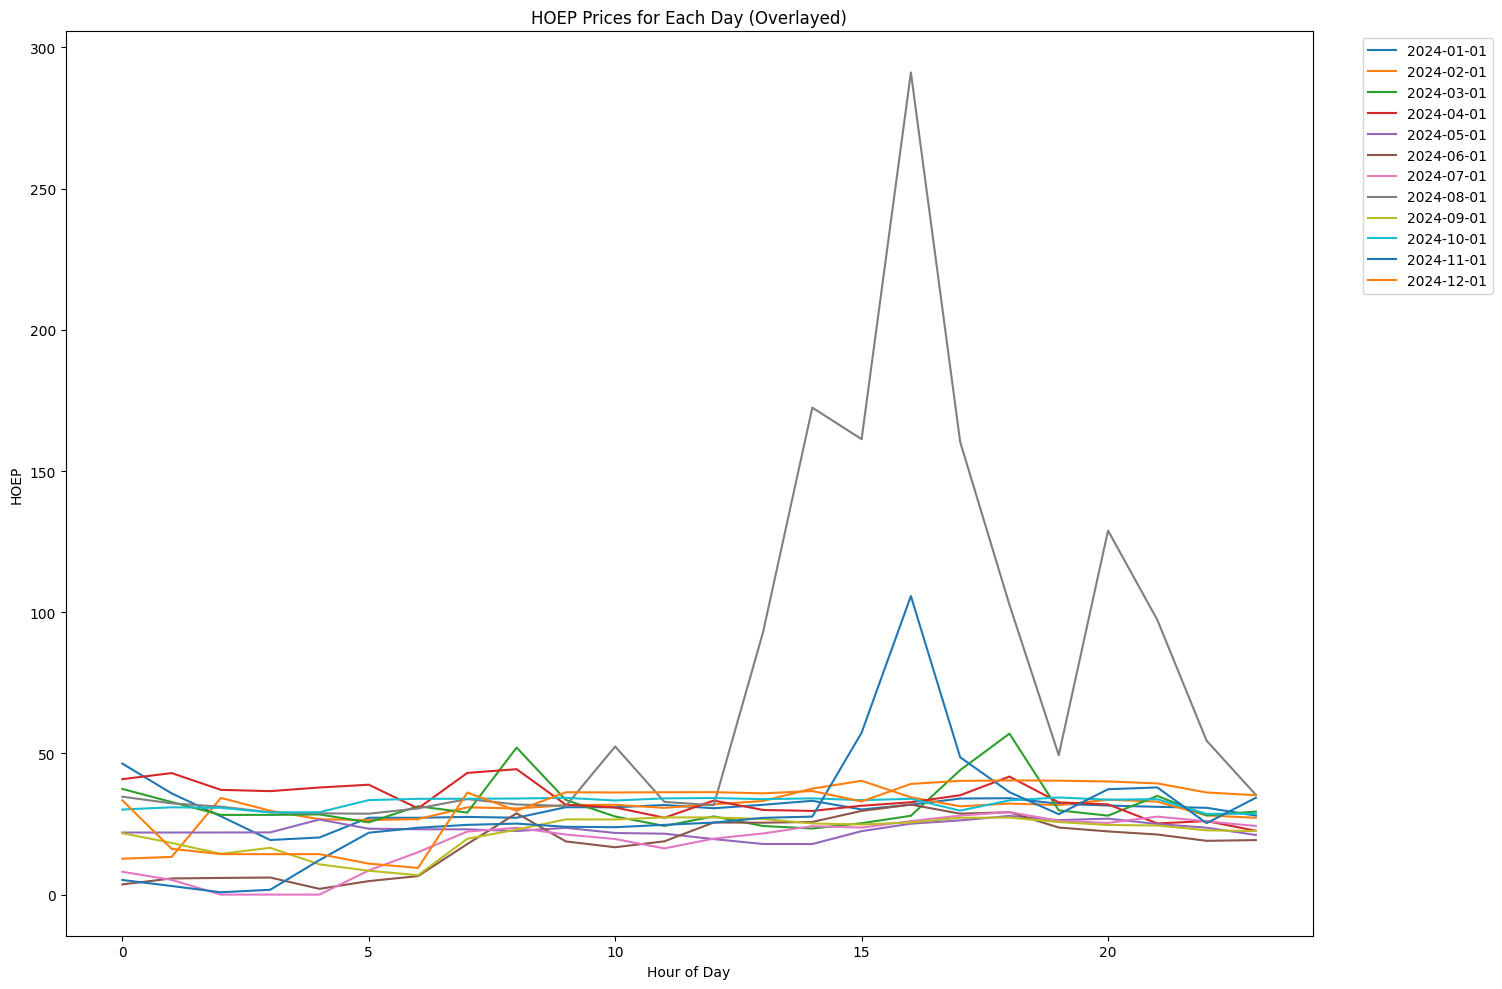

In [ ]:
days = ["2024-01-01", "2024-02-01", "2024-03-01", "2024-04-01", "2024-05-01",
        "2024-06-01","2024-07-01", "2024-08-01", "2024-09-01", "2024-10-01",
        "2024-11-01", "2024-12-01"]

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for day in days:
    day_ts = pd.to_datetime(day, format="%Y-%m-%d")
    day_df = df[df.index.date == day_ts.date()]
    plt.plot(day_df.index.hour, day_df["HOEP"], label=day)  # Plot hour on x-axis

plt.xlabel("Hour of Day")
plt.ylabel("HOEP")
plt.title("HOEP Prices for Each Day (Overlayed)")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1)) # Place legend outside the plot
plt.tight_layout()
plt.show()

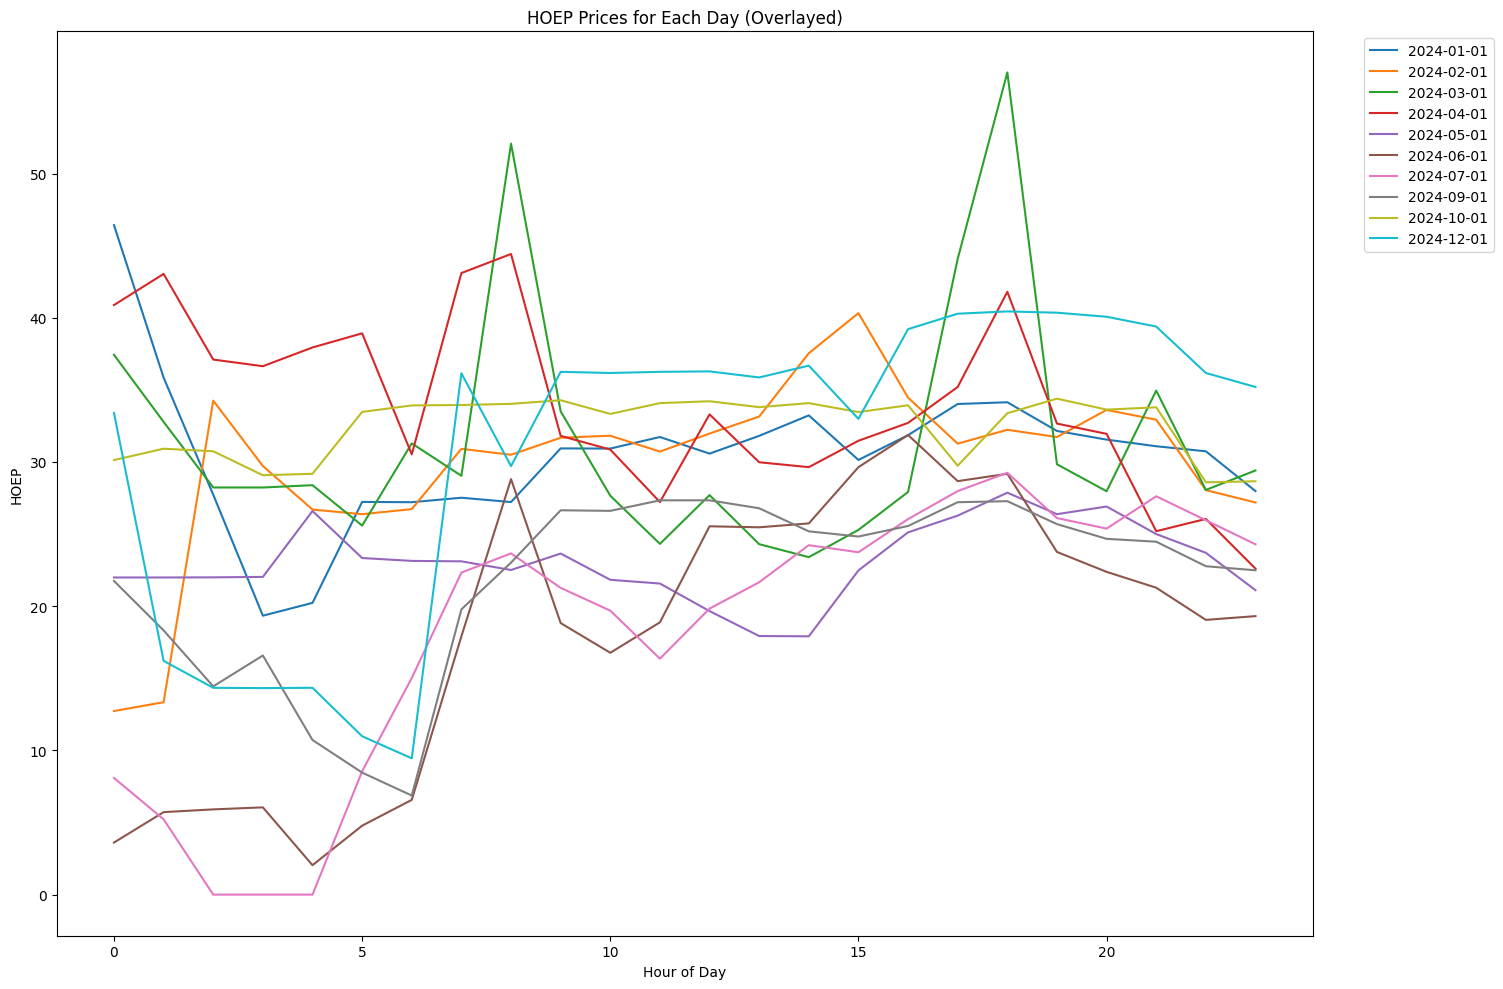

In [ ]:
#without august and november
days = ["2024-01-01", "2024-02-01", "2024-03-01", "2024-04-01", "2024-05-01",
        "2024-06-01","2024-07-01", "2024-09-01", "2024-10-01", "2024-12-01"]

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for day in days:
    day_ts = pd.to_datetime(day, format="%Y-%m-%d")
    day_df = df[df.index.date == day_ts.date()]
    plt.plot(day_df.index.hour, day_df["HOEP"], label=day)  # Plot hour on x-axis

plt.xlabel("Hour of Day")
plt.ylabel("HOEP")
plt.title("HOEP Prices for Each Day (Overlayed)")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1)) # Place legend outside the plot
plt.tight_layout()
plt.show()